In [1]:

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

x = tf.range(4, dtype = tf.float32)
x

<tf.Tensor: shape=(4,), dtype=float32, numpy=array([0., 1., 2., 3.], dtype=float32)>

In [2]:
x = tf.Variable(x)

In [3]:
with tf.GradientTape() as t:
    y = 2 * tf.tensordot(x, x, axes = 1)

y

<tf.Tensor: shape=(), dtype=float32, numpy=28.0>

In [4]:
x_grad = t.gradient(y, x)
x_grad

<tf.Tensor: shape=(4,), dtype=float32, numpy=array([ 0.,  4.,  8., 12.], dtype=float32)>

In [5]:
with tf.GradientTape() as t:
    y = tf.reduce_sum(x)

t.gradient(y, x)

<tf.Tensor: shape=(4,), dtype=float32, numpy=array([1., 1., 1., 1.], dtype=float32)>

Detaching computation

In [6]:
with tf.GradientTape(persistent=True) as t:
    y = x * x
    u  = tf.stop_gradient(y)
    z = u * x
    
x_grad = t.gradient(z, x)
x_grad == u


<tf.Tensor: shape=(4,), dtype=bool, numpy=array([ True,  True,  True,  True])>

In [7]:
t.gradient(y, x) == 2 * x

<tf.Tensor: shape=(4,), dtype=bool, numpy=array([ True,  True,  True,  True])>

Computing the gradient of python control flow

In [8]:
def f(a):
    b = a * 2
    while tf.norm(b) < 1000:
        b = b * 2
    if tf.reduce_sum(b) > 0:
        c = b
    else:
        c = 100 * b
    return c

In [9]:
a = tf.Variable(tf.random.normal(shape = ()))
with tf.GradientTape() as t:
    d = f(a)
d_grad = t.gradient(d, a)
d_grad

<tf.Tensor: shape=(), dtype=float32, numpy=409600.0>

In [10]:
d_grad == d/a

<tf.Tensor: shape=(), dtype=bool, numpy=True>

## Exercises

In [11]:
def f(x):
    return tf.math.sin(x)

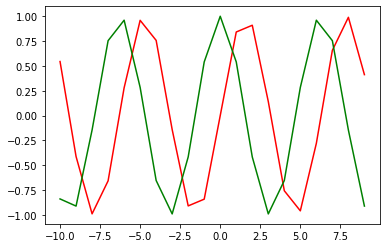

In [23]:
x = tf.range(-10, 10,.1, dtype = tf.float32)
x = tf.Variable(x)

with tf.GradientTape() as t:
    y = f(x)

d_grad = t.gradient(y, x)

plt.figure(1)
plt.plot(x.numpy(), f(x).numpy(), color='r')
plt.plot(x.numpy(), d_grad.numpy(), color='g')
plt.show()
